In [1]:
# Linear regression, algorithm is super simple

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy import array
import math 


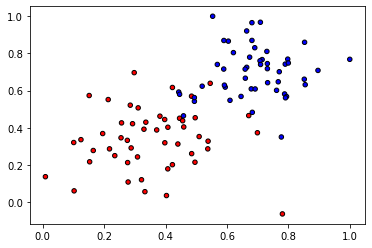

In [9]:
# Loading the data
Data = np.loadtxt("datapoints.txt", delimiter=",") 
DataPoints = list(zip(Data.T[0], Data.T[1]))

colors = []
for x in Data.T[2]:
    if x == 1:
        colors.append("r")
    else:
        colors.append("blue")
# Sorting the red and blue colours

plt.scatter(
    x = Data.T[0], 
    y = Data.T[1], 
    vmin=-0.5, 
    s=20, 
    c=colors,
    edgecolors='black'
) # Scatter Plot

In [3]:

np.random.seed(123456)

"""
If equation of x1*w1 + x2*w2 + b is above 0. Return 1. Otherwise return 0.
"""
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

"""
Predict wether the x,y point is red/blue.
"""
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

"""
The algorithm this simple AI uses.

Blue is classified as 0.
Red is classified as 1.
"""
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        # A red point in the blue area
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
            # Move line closer to the misclassified red point
            
        # A blue point in the red area
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
            # Move line closer to the misclassified blue point
            
    return W, b

x_min, x_max = min(Data.T[0]), max(Data.T[0])
y_min, y_max = min(Data.T[1]), max(Data.T[1])

[[0.55013016]
 [0.19700829]] 1.2320328314967264
[-0.20974914437816772, -0.36116481235925363] 0.2720328314967255


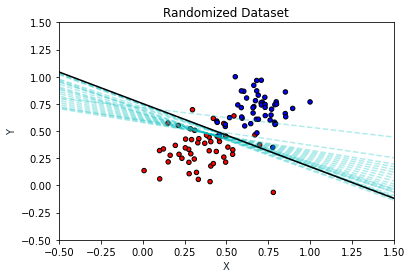

In [11]:
Weights = np.array(np.random.rand(2,1))
Bias = np.random.rand(1)[0] + x_max 
# Adding the x_max to the bias gives more accuracy, try without it, the lines will be messed up but will still work.

boundary_lines = []

print(Weights, Bias) # Comparison 1

for i in range(25):
    Output = perceptronStep(
        DataPoints, # X, Y of a point
        Data.T[2], # The True/False Data
        Weights, # Random weights
        Bias # Random bias based on x_max
    )
    Weights, Bias = Output # The updated values
    boundary_lines.append((-Weights[0]/Weights[1], -Bias/Weights[1]))

RW = Weights
Weights = list(Weights[0]) + list(Weights[1]) # Simplifying

print(Weights, Bias) # Comparison 2 

plt.scatter(
    x = Data.T[0], 
    y = Data.T[1], 
    vmin=-0.5, 
    s=20, 
    c=colors,
    edgecolors='black'
) # Scatter Plot

plt.xlim(-0.5,1.5) # Set a veiw range
plt.ylim(-0.5,1.5)

for y in boundary_lines:
    x = np.linspace(start=-10, stop=10, num=5)
    plt.plot(x, y[0] * x + y[1], linestyle="--", color="c", alpha=0.3)
    # This shows how the line adjusted.

Slope = -Weights[0]/Weights[1] # Calculating slope of the line
Intercept = -Bias/Weights[1] # Calculating intercept of the line

x = np.linspace(
    start=-10, # How big the line'll be.
    stop=10,
    num=5 # Amount of dots that will be connected to generate
)
y = Slope * x + Intercept # Yeah same thing for above above

plt.plot(x, y, "k") # Drawing the line

# The labels
plt.title("Randomized Dataset")
plt.xlabel('X', color='#1C2833')
plt.ylabel('Y', color='#1C2833')

plt.show()



In [14]:
# Predicting

num = 25

DataPoint = DataPoints[num]
print(f"X, Y: {DataPoint}", f"Answer: {Data.T[2][num]}")

### Method 1

x1, x2 = DataPoint
w1, w2 = Weights
b = Bias

Val = w1 * x1 + w2 * x2 + b
print("Prediction:", stepFunction(Val))

### Method 2
Val = prediction(
    DataPoint, 
    RW, Bias
)
print(f"Is red?", bool(Val))

# Literally the same method

X, Y: (0.29767, 0.69648) Answer: 1.0
Prediction: 0
Is red? False
